### РК2 №2 Абдуллаев Т.Х.ИУ5-63Б  Вариант 1

### Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import warnings
warnings.filterwarnings('ignore')
sns.set(style="ticks")
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC , LinearSVC
from sklearn.datasets.samples_generator import make_blobs
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot as plt

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
data = pd.DataFrame(boston.data, columns=boston.feature_names)
data['TARGET'] = boston.target

In [3]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
data.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
TARGET     float64
dtype: object

In [5]:
data.isnull().sum()
# проверим есть ли пропущенные значения

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
TARGET     0
dtype: int64

In [6]:
data.drop(['CRIM','ZN','CHAS','DIS', 'PTRATIO'], axis = 1, inplace = True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   INDUS   506 non-null    float64
 1   NOX     506 non-null    float64
 2   RM      506 non-null    float64
 3   AGE     506 non-null    float64
 4   RAD     506 non-null    float64
 5   TAX     506 non-null    float64
 6   B       506 non-null    float64
 7   LSTAT   506 non-null    float64
 8   TARGET  506 non-null    float64
dtypes: float64(9)
memory usage: 35.7 KB


In [8]:
data.head()

,INDUS,NOX,RM,AGE,RAD,TAX,B,LSTAT,TARGET
0,2.31,0.538,6.575,65.2,1.0,296.0,396.90,4.98,24.0
1,7.07,0.469,6.421,78.9,2.0,242.0,396.90,9.14,21.6
2,7.07,0.469,7.185,61.1,2.0,242.0,392.83,4.03,34.7
3,2.18,0.458,6.998,45.8,3.0,222.0,394.63,2.94,33.4
4,2.18,0.458,7.147,54.2,3.0,222.0,396.90,5.33,36.2


<AxesSubplot:>

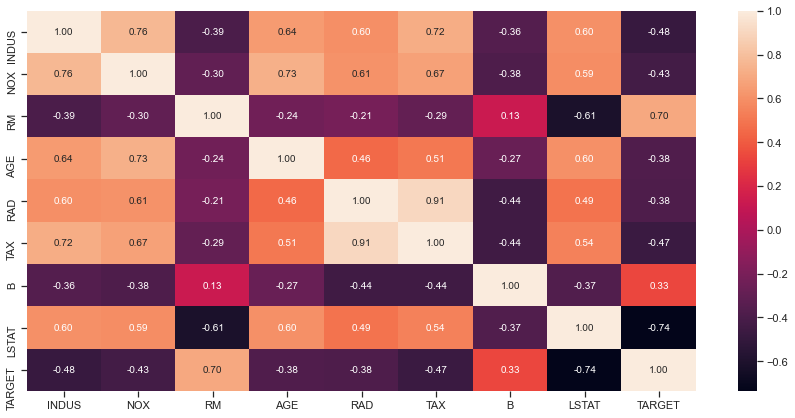

In [9]:
#Построим корреляционную матрицу
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(data.corr(method='pearson'), ax=ax, annot=True, fmt='.2f')

In [10]:
X = data.drop(['TAX'], axis = 1)
Y = data.TAX
print('Входные данные:\n\n', X.head(), '\n\nВыходные данные:\n\n', Y.head())

Входные данные:

    INDUS    NOX     RM   AGE  RAD       B  LSTAT  TARGET
0   2.31  0.538  6.575  65.2  1.0  396.90   4.98    24.0
1   7.07  0.469  6.421  78.9  2.0  396.90   9.14    21.6
2   7.07  0.469  7.185  61.1  2.0  392.83   4.03    34.7
3   2.18  0.458  6.998  45.8  3.0  394.63   2.94    33.4
4   2.18  0.458  7.147  54.2  3.0  396.90   5.33    36.2 

Выходные данные:

 0    296.0
1    242.0
2    242.0
3    222.0
4    222.0
Name: TAX, dtype: float64


In [11]:
X_train,  X_test,  Y_train,  Y_test = train_test_split(X,  Y, random_state = 0, test_size = 0.1)
print('Входные параметры обучающей выборки:\n\n',X_train.head(), \
      '\n\nВходные параметры тестовой выборки:\n\n', X_test.head(), \
      '\n\nВыходные параметры обучающей выборки:\n\n', Y_train.head(), \
      '\n\nВыходные параметры тестовой выборки:\n\n', Y_test.head())

Входные параметры обучающей выборки:

      INDUS    NOX     RM   AGE  RAD       B  LSTAT  TARGET
495   9.69  0.585  5.670  28.8  6.0  393.29  17.60    23.1
230   6.20  0.504  5.981  68.1  8.0  378.35  11.65    24.3
253   5.86  0.431  8.259   8.4  7.0  396.90   3.54    42.8
134  21.89  0.624  5.757  98.4  4.0  262.76  17.31    15.6
12    7.87  0.524  5.889  39.0  5.0  390.50  15.71    21.7 

Входные параметры тестовой выборки:

      INDUS    NOX     RM    AGE   RAD       B  LSTAT  TARGET
329   3.24  0.460  6.333   17.2   4.0  375.21   7.34    22.6
371  18.10  0.631  6.216  100.0  24.0  366.15   9.53    50.0
219  13.89  0.550  6.373   92.4   5.0  393.74  10.50    23.0
403  18.10  0.693  5.349   96.0  24.0  396.90  19.77     8.3
78   12.83  0.437  6.232   53.7   5.0  386.40  12.34    21.2 

Выходные параметры обучающей выборки:

 495    391.0
230    307.0
253    330.0
134    437.0
12     311.0
Name: TAX, dtype: float64 

Выходные параметры тестовой выборки:

 329    430.0
371    666.0
2

In [12]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.tree import export_graphviz
from sklearn import tree
import re

In [13]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)
lr_y_pred = clf.predict(X_test)

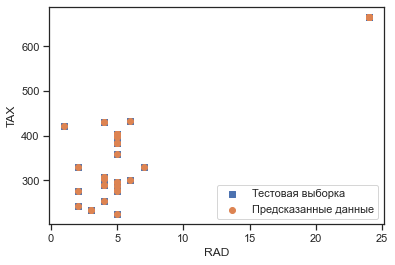

In [14]:
plt.scatter(X_test.RAD, Y_test,    marker = 's', label = 'Тестовая выборка')
plt.scatter(X_test.RAD, lr_y_pred, marker = 'o', label = 'Предсказанные данные')
plt.legend (loc = 'lower right')
plt.xlabel ('RAD')
plt.ylabel ('TAX')
plt.show()

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,  median_absolute_error, r2_score 
from sklearn.ensemble import RandomForestRegressor

In [16]:
forest_1 = RandomForestRegressor(n_estimators=5, oob_score=True, random_state=10)
forest_1.fit(X, Y)

RandomForestRegressor(n_estimators=5, oob_score=True, random_state=10)

In [17]:
Y_predict = forest_1.predict(X_test)
print('Средняя абсолютная ошибка:',   mean_absolute_error(Y_test, Y_predict))
print('Средняя квадратичная ошибка:', mean_squared_error(Y_test, Y_predict))
print('Median absolute error:',       median_absolute_error(Y_test, Y_predict))
print('Коэффициент детерминации:',    r2_score(Y_test, Y_predict))

Средняя абсолютная ошибка: 5.243137254901962
Средняя квадратичная ошибка: 273.555294117647
Median absolute error: 0.0
Коэффициент детерминации: 0.9899469772829541


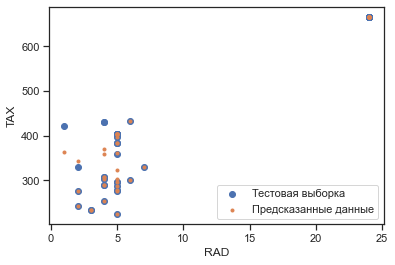

In [18]:
plt.scatter(X_test.RAD, Y_test,    marker = 'o', label = 'Тестовая выборка')
plt.scatter(X_test.RAD, Y_predict, marker = '.', label = 'Предсказанные данные')
plt.legend(loc = 'lower right')
plt.xlabel('RAD')
plt.ylabel('TAX')
plt.show()